In [37]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import librosa
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import sklearn.metrics
from sklearn.metrics import accuracy_score, classification_report
import pickle
import os
from pydub import AudioSegment
from collections import Counter

## Loading data

In [2]:
train_df = pd.read_csv("merged_train.csv")
test_df = pd.read_csv("merged_test.csv")

In [3]:
train_df['label'].value_counts()

label
rock                       5894
pop                        5146
classical                  5111
ambient                    2000
dnb                        2000
house                      2000
phonk                      2000
hardstyle                  2000
lofi                       2000
techno                     2000
moombahton_reggaeton       2000
psytrance                  2000
hardcore                   2000
future_garage_wave_trap    2000
big_room_house             2000
dubstep                    2000
trap                       2000
trance                     2000
synthwave                  2000
Name: count, dtype: int64

In [4]:
def balance_subset(subset_df, max_count):
    return subset_df.groupby('label').apply(lambda x: x.sample(min(len(x), max_count), random_state=42)).reset_index(drop=True)

# Так как из-за новых данных происходит дисбаланс классов, на рандом отрежем часть данных
balanced_train_df = balance_subset(train_df, 2500)
balanced_test_df = balance_subset(test_df, 500)

C:\Users\szabu\AppData\Local\Temp\ipykernel_208\1516283524.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return subset_df.groupby('label').apply(lambda x: x.sample(min(len(x), max_count), random_state=42)).reset_index(drop=True)
C:\Users\szabu\AppData\Local\Temp\ipykernel_208\1516283524.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return subset_df.groupby('label').apply(lambda x: x.sample(min(l

In [5]:
X_train = balanced_train_df.drop(columns=['label'])
y_train = balanced_train_df['label']

X_test = balanced_test_df.drop(columns=['label'])
y_test = balanced_test_df['label']

In [15]:
models = {
    'Logistic Regression': make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000, random_state=42)),
    'Random Forest': RandomForestClassifier(n_estimators=70, random_state=42),
    'CatBoost': CatBoostClassifier(iterations=1000, learning_rate=0.05, depth=5, silent=False, random_state=42),
    'SVM': make_pipeline(StandardScaler(), SVC(probability=True, max_iter=2500,random_state=42)),
    'Naive Bayes': GaussianNB()
}

In [7]:
def train_and_show_report(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    print(classification_report(y_test, y_pred, target_names=y_train.unique()))
    
    cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
    
    sns.heatmap(pd.DataFrame(cm, columns=y_train.unique(), index=y_train.unique()))
    plt.show()

## Trying different kinds of models

Accuracy: 0.6888
                         precision    recall  f1-score   support

                ambient       0.70      0.83      0.76       500
         big_room_house       0.50      0.61      0.55       500
              classical       0.87      0.87      0.87       500
                    dnb       0.53      0.52      0.53       500
                dubstep       0.75      0.86      0.80       500
future_garage_wave_trap       0.59      0.56      0.57       500
               hardcore       0.69      0.81      0.74       500
              hardstyle       0.87      0.91      0.89       500
                  house       0.68      0.48      0.56       500
                   lofi       0.77      0.88      0.82       500
   moombahton_reggaeton       0.60      0.44      0.51       500
                  phonk       0.85      0.72      0.78       500
                    pop       0.59      0.65      0.62       500
              psytrance       0.83      0.69      0.75       500
       

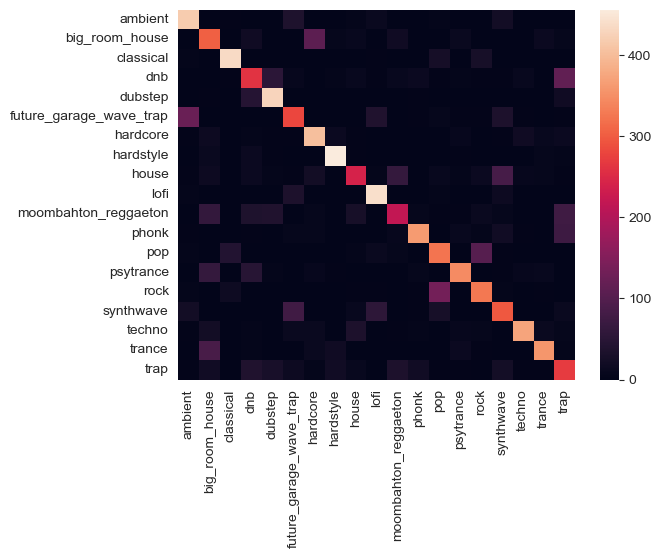

In [8]:
model = models['Logistic Regression']
train_and_show_report(model)

C:\Users\szabu\anaconda3\envs\classical-ml\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7336
                         precision    recall  f1-score   support

                ambient       0.83      0.83      0.83       500
         big_room_house       0.57      0.76      0.65       500
              classical       0.77      0.92      0.84       500
                    dnb       0.53      0.46      0.49       500
                dubstep       0.71      0.86      0.78       500
future_garage_wave_trap       0.63      0.74      0.68       500
               hardcore       0.86      0.85      0.85       500
              hardstyle       0.91      0.93      0.92       500
                  house       0.82      0.56      0.67       500
                   lofi       0.79      0.87      0.83       500
   moombahton_reggaeton       0.62      0.51      0.56       500
                  phonk       0.94      0.78      0.85       500
                    pop       0.61      0.72      0.66       500
              psytrance       0.87      0.79      0.83       500
       

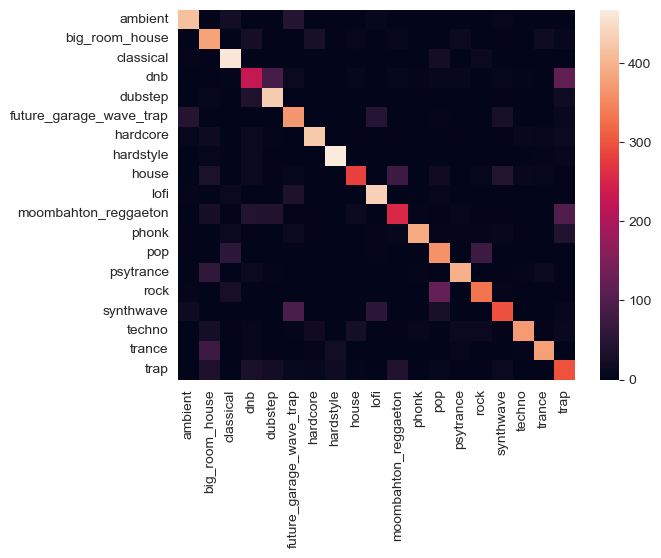

In [14]:
model = models['SVM']
train_and_show_report(model)

Accuracy: 0.6646
                         precision    recall  f1-score   support

                ambient       0.78      0.85      0.81       500
         big_room_house       0.59      0.56      0.57       500
              classical       0.80      0.84      0.82       500
                    dnb       0.51      0.33      0.40       500
                dubstep       0.68      0.85      0.76       500
future_garage_wave_trap       0.47      0.74      0.58       500
               hardcore       0.73      0.83      0.78       500
              hardstyle       0.91      0.91      0.91       500
                  house       0.60      0.48      0.53       500
                   lofi       0.69      0.89      0.78       500
   moombahton_reggaeton       0.52      0.48      0.50       500
                  phonk       0.92      0.67      0.77       500
                    pop       0.56      0.64      0.60       500
              psytrance       0.74      0.82      0.78       500
       

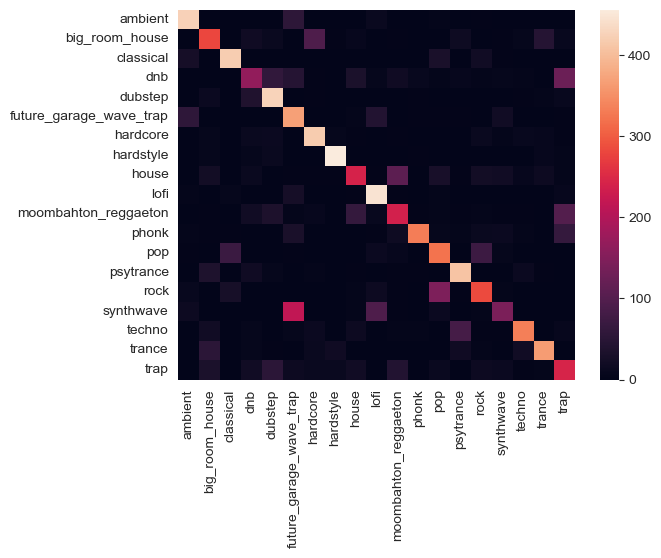

In [13]:
model = models['Random Forest']
train_and_show_report(model)

0:	learn: 2.7977371	total: 88.1ms	remaining: 1m 28s
1:	learn: 2.6949660	total: 166ms	remaining: 1m 22s
2:	learn: 2.6047642	total: 257ms	remaining: 1m 25s
3:	learn: 2.5288230	total: 353ms	remaining: 1m 27s
4:	learn: 2.4464090	total: 452ms	remaining: 1m 29s
5:	learn: 2.3741416	total: 542ms	remaining: 1m 29s
6:	learn: 2.3172032	total: 629ms	remaining: 1m 29s
7:	learn: 2.2562848	total: 719ms	remaining: 1m 29s
8:	learn: 2.2122793	total: 807ms	remaining: 1m 28s
9:	learn: 2.1650359	total: 896ms	remaining: 1m 28s
10:	learn: 2.1146569	total: 991ms	remaining: 1m 29s
11:	learn: 2.0764244	total: 1.07s	remaining: 1m 28s
12:	learn: 2.0415584	total: 1.15s	remaining: 1m 27s
13:	learn: 2.0011801	total: 1.24s	remaining: 1m 27s
14:	learn: 1.9686412	total: 1.32s	remaining: 1m 26s
15:	learn: 1.9413339	total: 1.41s	remaining: 1m 26s
16:	learn: 1.9069840	total: 1.49s	remaining: 1m 26s
17:	learn: 1.8758904	total: 1.58s	remaining: 1m 26s
18:	learn: 1.8482154	total: 1.67s	remaining: 1m 26s
19:	learn: 1.8173802	

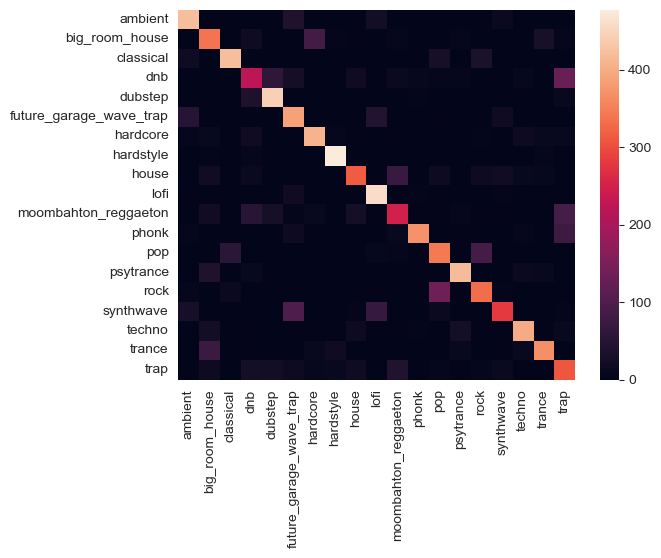

In [11]:
model = models['CatBoost']
train_and_show_report(model)

Accuracy: 0.5246
                         precision    recall  f1-score   support

                ambient       0.70      0.85      0.77       500
         big_room_house       0.47      0.51      0.49       500
              classical       0.77      0.65      0.71       500
                    dnb       0.36      0.26      0.31       500
                dubstep       0.52      0.63      0.57       500
future_garage_wave_trap       0.34      0.58      0.43       500
               hardcore       0.84      0.52      0.64       500
              hardstyle       0.76      0.84      0.80       500
                  house       0.39      0.49      0.44       500
                   lofi       0.68      0.78      0.73       500
   moombahton_reggaeton       0.36      0.31      0.34       500
                  phonk       0.58      0.52      0.55       500
                    pop       0.51      0.36      0.42       500
              psytrance       0.55      0.82      0.66       500
       

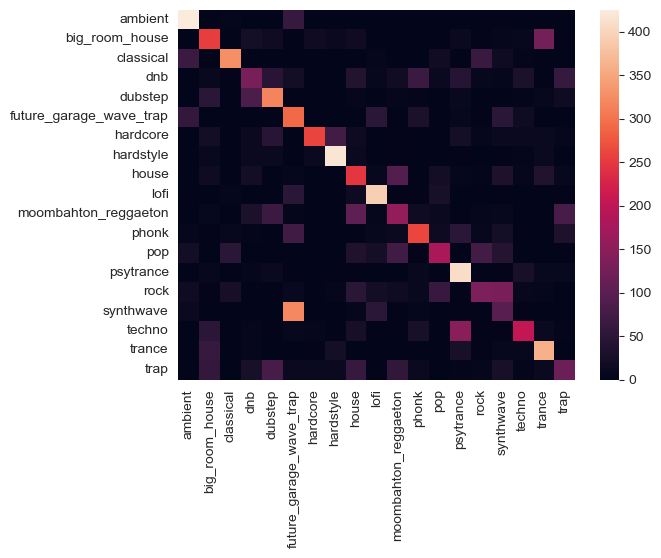

In [17]:
model = models['Naive Bayes']
train_and_show_report(model)

## SVC looks promising, lets try to tune it (catboost also did well, but it's too boring)
### Tuning is done by first finding the optimal kernel, after that tweaking a bunch of parameters

C:\Users\szabu\anaconda3\envs\classical-ml\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7336
                         precision    recall  f1-score   support

                ambient       0.83      0.83      0.83       500
         big_room_house       0.57      0.76      0.65       500
              classical       0.77      0.92      0.84       500
                    dnb       0.53      0.46      0.49       500
                dubstep       0.71      0.86      0.78       500
future_garage_wave_trap       0.63      0.74      0.68       500
               hardcore       0.86      0.85      0.85       500
              hardstyle       0.91      0.93      0.92       500
                  house       0.82      0.56      0.67       500
                   lofi       0.79      0.87      0.83       500
   moombahton_reggaeton       0.62      0.51      0.56       500
                  phonk       0.94      0.78      0.85       500
                    pop       0.61      0.72      0.66       500
              psytrance       0.87      0.79      0.83       500
       

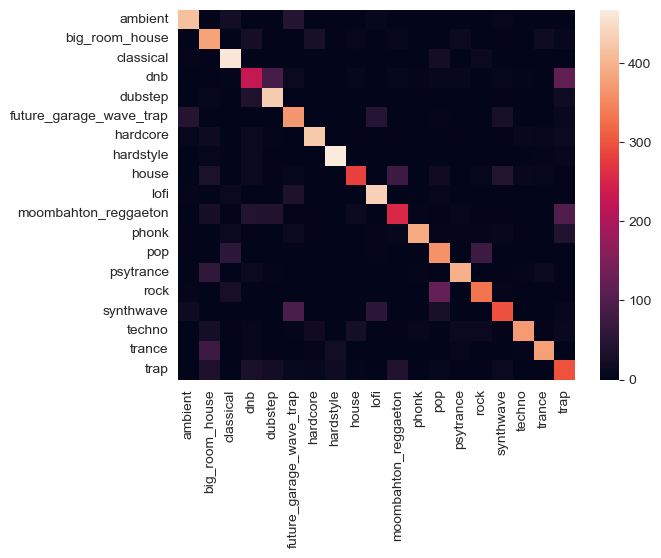

In [20]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, max_iter=2500, random_state=42))
train_and_show_report(model)

C:\Users\szabu\anaconda3\envs\classical-ml\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.6438
                         precision    recall  f1-score   support

                ambient       0.72      0.85      0.78       500
         big_room_house       0.45      0.71      0.55       500
              classical       0.76      0.72      0.74       500
                    dnb       0.45      0.44      0.44       500
                dubstep       0.58      0.67      0.62       500
future_garage_wave_trap       0.57      0.65      0.61       500
               hardcore       0.71      0.77      0.74       500
              hardstyle       0.87      0.90      0.89       500
                  house       0.73      0.54      0.62       500
                   lofi       0.76      0.83      0.79       500
   moombahton_reggaeton       0.56      0.46      0.51       500
                  phonk       0.82      0.60      0.69       500
                    pop       0.53      0.54      0.53       500
              psytrance       0.79      0.66      0.72       500
       

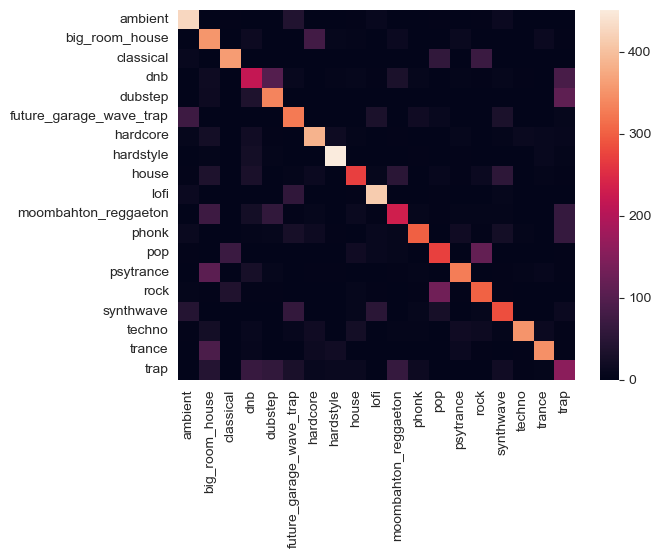

In [21]:
model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True, max_iter=2500,random_state=42))
train_and_show_report(model)

C:\Users\szabu\anaconda3\envs\classical-ml\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.6901
                         precision    recall  f1-score   support

                ambient       0.86      0.81      0.84       500
         big_room_house       0.54      0.71      0.61       500
              classical       0.87      0.85      0.86       500
                    dnb       0.41      0.48      0.44       500
                dubstep       0.74      0.80      0.77       500
future_garage_wave_trap       0.58      0.72      0.64       500
               hardcore       0.89      0.79      0.84       500
              hardstyle       0.88      0.90      0.89       500
                  house       0.69      0.53      0.60       500
                   lofi       0.82      0.82      0.82       500
   moombahton_reggaeton       0.59      0.39      0.47       500
                  phonk       0.92      0.58      0.71       500
                    pop       0.65      0.61      0.63       500
              psytrance       0.86      0.83      0.84       500
       

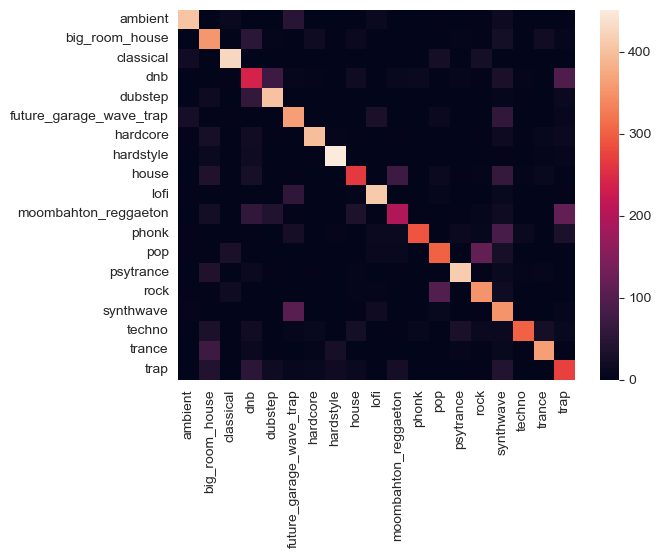

In [22]:
model = make_pipeline(StandardScaler(), SVC(kernel='poly', probability=True, max_iter=2500,random_state=42))
train_and_show_report(model)

C:\Users\szabu\anaconda3\envs\classical-ml\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7336
                         precision    recall  f1-score   support

                ambient       0.83      0.83      0.83       500
         big_room_house       0.57      0.76      0.65       500
              classical       0.77      0.92      0.84       500
                    dnb       0.53      0.46      0.49       500
                dubstep       0.71      0.86      0.78       500
future_garage_wave_trap       0.63      0.74      0.68       500
               hardcore       0.86      0.85      0.85       500
              hardstyle       0.91      0.93      0.92       500
                  house       0.82      0.56      0.67       500
                   lofi       0.79      0.87      0.83       500
   moombahton_reggaeton       0.62      0.51      0.56       500
                  phonk       0.94      0.78      0.85       500
                    pop       0.61      0.72      0.66       500
              psytrance       0.87      0.79      0.83       500
       

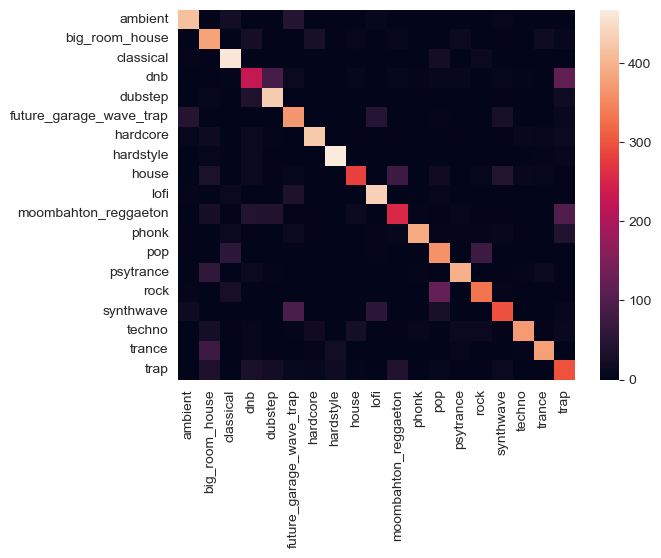

In [29]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, max_iter=2500,gamma='auto', random_state=42))
train_and_show_report(model)

C:\Users\szabu\anaconda3\envs\classical-ml\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7336
                         precision    recall  f1-score   support

                ambient       0.83      0.83      0.83       500
         big_room_house       0.57      0.76      0.65       500
              classical       0.77      0.92      0.84       500
                    dnb       0.53      0.46      0.49       500
                dubstep       0.71      0.86      0.78       500
future_garage_wave_trap       0.63      0.74      0.68       500
               hardcore       0.86      0.85      0.85       500
              hardstyle       0.91      0.93      0.92       500
                  house       0.82      0.56      0.67       500
                   lofi       0.79      0.87      0.83       500
   moombahton_reggaeton       0.62      0.51      0.56       500
                  phonk       0.94      0.78      0.85       500
                    pop       0.61      0.72      0.66       500
              psytrance       0.87      0.79      0.83       500
       

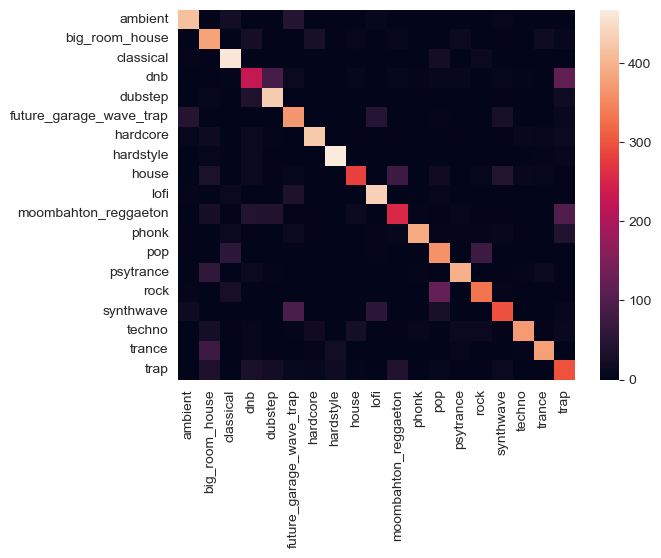

In [28]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, max_iter=2500,gamma='scale', random_state=42))
train_and_show_report(model)

Accuracy: 0.6812
                         precision    recall  f1-score   support

                ambient       0.78      0.84      0.81       500
         big_room_house       0.58      0.66      0.62       500
              classical       0.63      0.90      0.74       500
                    dnb       0.46      0.37      0.41       500
                dubstep       0.68      0.84      0.75       500
future_garage_wave_trap       0.51      0.69      0.59       500
               hardcore       0.85      0.83      0.84       500
              hardstyle       0.89      0.93      0.91       500
                  house       0.70      0.53      0.60       500
                   lofi       0.74      0.88      0.80       500
   moombahton_reggaeton       0.58      0.47      0.52       500
                  phonk       0.87      0.72      0.79       500
                    pop       0.56      0.62      0.59       500
              psytrance       0.85      0.79      0.82       500
       

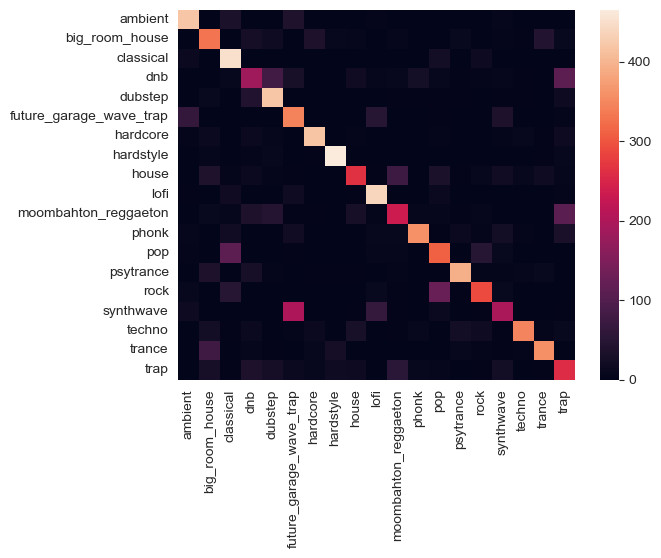

In [27]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, max_iter=2500,C=0.1, random_state=42))
train_and_show_report(model)

C:\Users\szabu\anaconda3\envs\classical-ml\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7336
                         precision    recall  f1-score   support

                ambient       0.83      0.83      0.83       500
         big_room_house       0.57      0.76      0.65       500
              classical       0.77      0.92      0.84       500
                    dnb       0.53      0.46      0.49       500
                dubstep       0.71      0.86      0.78       500
future_garage_wave_trap       0.63      0.74      0.68       500
               hardcore       0.86      0.85      0.85       500
              hardstyle       0.91      0.93      0.92       500
                  house       0.82      0.56      0.67       500
                   lofi       0.79      0.87      0.83       500
   moombahton_reggaeton       0.62      0.51      0.56       500
                  phonk       0.94      0.78      0.85       500
                    pop       0.61      0.72      0.66       500
              psytrance       0.87      0.79      0.83       500
       

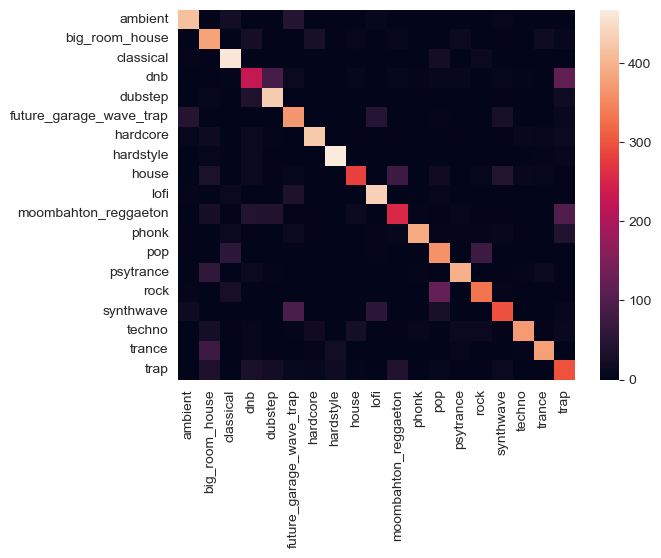

In [25]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, max_iter=2500,C=1, random_state=42))
train_and_show_report(model)

C:\Users\szabu\anaconda3\envs\classical-ml\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7269
                         precision    recall  f1-score   support

                ambient       0.83      0.83      0.83       500
         big_room_house       0.56      0.79      0.66       500
              classical       0.77      0.92      0.84       500
                    dnb       0.51      0.45      0.48       500
                dubstep       0.70      0.84      0.77       500
future_garage_wave_trap       0.61      0.72      0.66       500
               hardcore       0.85      0.84      0.85       500
              hardstyle       0.88      0.94      0.91       500
                  house       0.80      0.56      0.66       500
                   lofi       0.79      0.85      0.82       500
   moombahton_reggaeton       0.62      0.51      0.56       500
                  phonk       0.95      0.79      0.86       500
                    pop       0.61      0.71      0.66       500
              psytrance       0.85      0.81      0.83       500
       

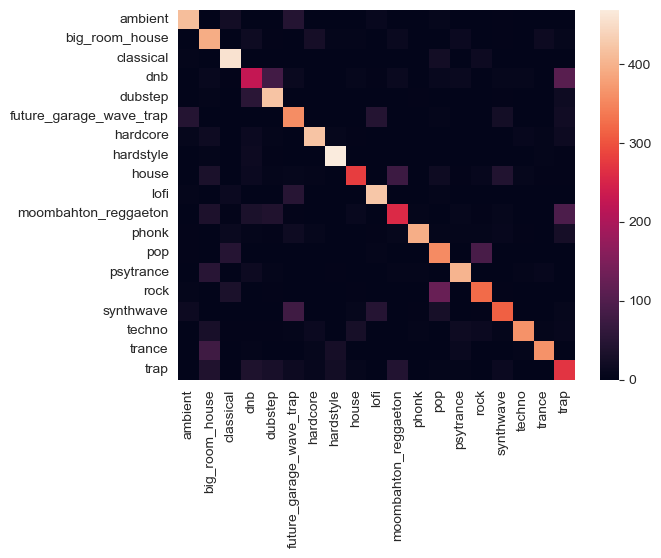

In [26]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, max_iter=2500,C=10, random_state=42))
train_and_show_report(model)

## Looks like default parameters gave the best shot yet, lets stick to it

C:\Users\szabu\anaconda3\envs\classical-ml\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.7336
                         precision    recall  f1-score   support

                ambient       0.83      0.83      0.83       500
         big_room_house       0.57      0.76      0.65       500
              classical       0.77      0.92      0.84       500
                    dnb       0.53      0.46      0.49       500
                dubstep       0.71      0.86      0.78       500
future_garage_wave_trap       0.63      0.74      0.68       500
               hardcore       0.86      0.85      0.85       500
              hardstyle       0.91      0.93      0.92       500
                  house       0.82      0.56      0.67       500
                   lofi       0.79      0.87      0.83       500
   moombahton_reggaeton       0.62      0.51      0.56       500
                  phonk       0.94      0.78      0.85       500
                    pop       0.61      0.72      0.66       500
              psytrance       0.87      0.79      0.83       500
       

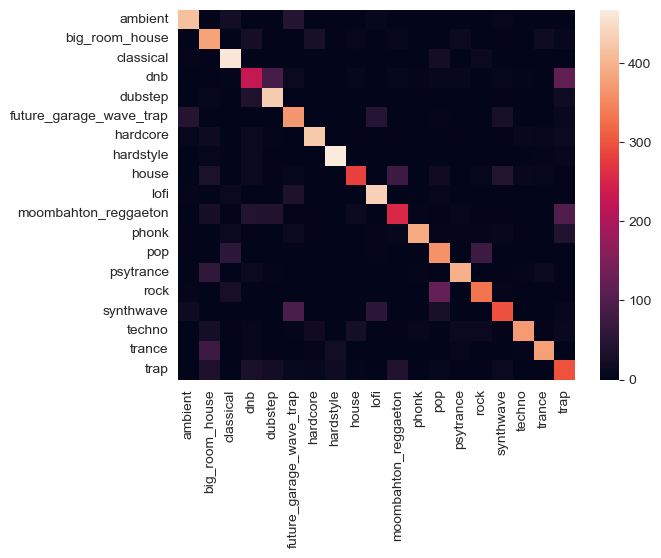

In [30]:
model = make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True, max_iter=4000, random_state=69))
train_and_show_report(model)

## Saving model

In [31]:
with open('SVM_model_best.pkl', 'wb') as file:
    pickle.dump(model, file)

## Loading model and making a prediction

In [33]:
with open('SVM_model_best.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [41]:
def extract_audio_features(file_path):

    y, sr = librosa.load(file_path)

    rmse = librosa.feature.rms(y=y)
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
    chroma_cqt = librosa.feature.chroma_cqt(y=y, sr=sr)
    spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

    features = {
        'rmse_mean': np.mean(rmse),
        'rmse_std': np.std(rmse),
        'spectral_centroid_mean': np.mean(spectral_centroid),
        'spectral_centroid_std': np.std(spectral_centroid),
        'spectral_bandwidth_mean': np.mean(spectral_bandwidth),
        'spectral_bandwidth_std': np.std(spectral_bandwidth),
        'rolloff_mean': np.mean(rolloff),
        'rolloff_std': np.std(rolloff),
        'zero_crossing_rate_mean': np.mean(zero_crossing_rate),
        'zero_crossing_rate_std': np.std(zero_crossing_rate),
    }

    for i in range(1, 41):
        features[f'mfcc{i}_mean'] = np.mean(mfcc[i-1])
        features[f'mfcc{i}_std'] = np.std(mfcc[i-1])

    for i in range(1, 13):
        features[f'chroma{i}_mean'] = np.mean(chroma[i-1])
        features[f'chroma{i}_std'] = np.std(chroma[i-1])

    for i in range(1, 7):
        features[f'tonnetz{i}_mean'] = np.mean(tonnetz[i-1])
        features[f'tonnetz{i}_std'] = np.std(tonnetz[i-1])

    features['chroma_cqt_mean'] = np.mean(chroma_cqt)
    features['chroma_cqt_std'] = np.std(chroma_cqt)

    features['spectral_contrast_mean'] = np.mean(spectral_contrast)
    features['spectral_contrast_std'] = np.std(spectral_contrast)

    return features



def convert_to_wav(file_path):
    base, ext = os.path.splitext(file_path)
    if ext.lower() != '.wav':
        wav_path = base + '.wav'
        AudioSegment.from_file(file_path).export(wav_path, format="wav")
        return wav_path
    return file_path


def split_audio(file_path, clip_length=3000):
    audio = AudioSegment.from_wav(file_path)
    clips = []
    for i in range(0, len(audio), clip_length):
        clip = audio[i:i + clip_length]
        if len(clip) == clip_length:
            clip_path = f"{file_path[:-4]}_clip_{i // clip_length}.wav"
            clip.export(clip_path, format="wav")
            clips.append(clip_path)
    return clips


def predict_genre_distribution(file_path, model):
    
    file_path = convert_to_wav(file_path)
    clips = split_audio(file_path)
    genre_counter = Counter()
    
    for clip in clips:
        features = extract_audio_features(clip)
        sample = pd.DataFrame(columns=features)
        sample.loc[0] = features
        predicted_genre = model.predict(sample)[0]
        genre_counter[predicted_genre] += 1
        os.remove(clip)
        
    return genre_counter

In [44]:
# Divide audio into 3 seconds long snippets, predict their genre and count it up
meow = predict_genre_distribution("../Data/dubstep1.mp3", loaded_model)

In [51]:
def format_genre_counter(counter):
    result = "Here's what I think about this song:\n"
    data = list(sorted(counter.items(), key=lambda x: -x[1]))
    data_sum = sum([e[1] for e in data])
    data_normalized = list(map(lambda x: (x[0], 100*x[1]/data_sum), data))
    for genre, count in data_normalized:
        result += f"{genre}: {count}%\n"
    return result

print(format_genre_counter(meow))

Here's what I think about this song:
dubstep: 37.5%
future_garage_wave_trap: 12.5%
phonk: 12.5%
classical: 12.5%
synthwave: 6.25%
pop: 6.25%
dnb: 6.25%
hardstyle: 3.125%
psytrance: 3.125%
